In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [3]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv', sep=';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.shape

(70000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


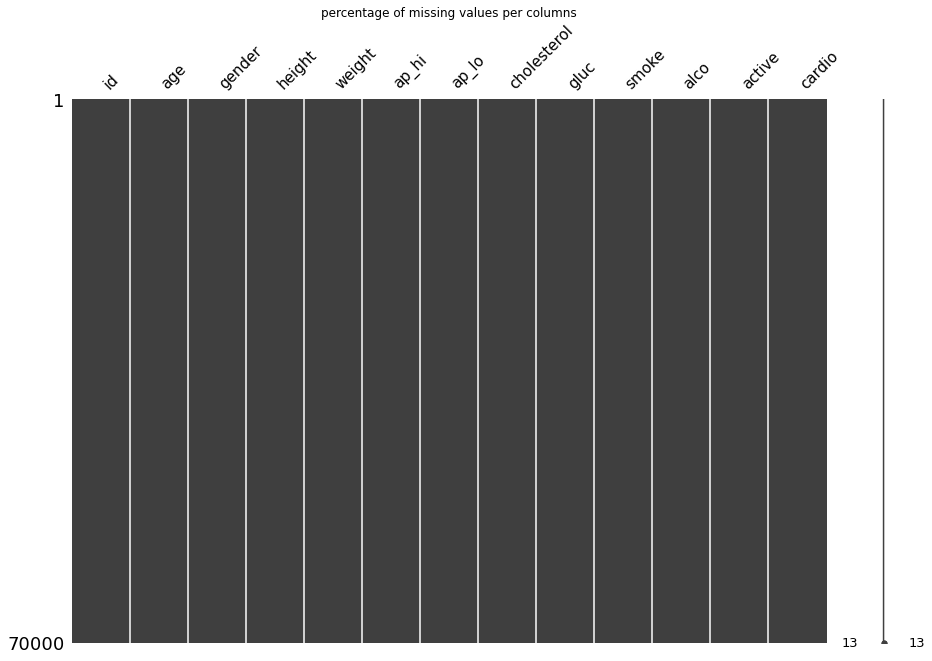

In [8]:
msno.matrix(df,figsize=(15,10),fontsize=15)
plt.title('percentage of missing values per columns')
plt.show()

In [9]:
#convert age from days to years
df['age'] = round(df['age']/365.25,2)
df['age']

0        50.36
1        55.38
2        51.63
3        48.25
4        47.84
         ...  
69995    52.68
69996    61.88
69997    52.20
69998    61.41
69999    56.24
Name: age, Length: 70000, dtype: float64

In [10]:
df['gender']=np.where(df['gender']==2,1,0)
df['gender']

0        1
1        0
2        0
3        1
4        0
        ..
69995    1
69996    0
69997    1
69998    0
69999    0
Name: gender, Length: 70000, dtype: int64

# Training Model

In [11]:
#splitting into dependent and independent features
X = df.drop('cardio', axis=1)
y = df['cardio']

In [12]:
#splitting into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train,y_train)

print('Train Accuracy: ', rand_forest.score(X_train,y_train))
print('Test Accuracy: ', rand_forest.score(X_test,y_test))

Train Accuracy:  0.9999523809523809
Test Accuracy:  0.7174285714285714


# Handling Overfitting

Let's try 'Stratified' train and test splits

## Stratified Train-Test Split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, test_size=0.2)

In [15]:
rand_forest.fit(X_train,y_train)

print('Train Accuracy: ', rand_forest.score(X_train,y_train))
print('Test Accuracy: ', rand_forest.score(X_test,y_test))

Train Accuracy:  0.9999821428571428
Test Accuracy:  0.7213571428571428


Overfitting again, let's try stratified K-Fold cross validation

## Stratified K-Fold Cross Validation

In [16]:
from sklearn.model_selection import StratifiedKFold

X = df.drop('cardio', axis=1).values
y = df['cardio'].values

kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
rand_forest.fit(X_train,y_train)

print('Train Accuracy: ', rand_forest.score(X_train,y_train))
print('Test Accuracy: ', rand_forest.score(X_test,y_test))

Train Accuracy:  0.9999642857142857
Test Accuracy:  0.7247857142857143


Let's try hyper-parameter tuning with GridSearchCV

## Hyper-parameter Tuning with GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 20]}

rand_forest = RandomForestClassifier()

grid_search = GridSearchCV(rand_forest, param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': 5, 'n_estimators': 200}


In [18]:
best_rand_forest = RandomForestClassifier(**best_params)

best_rand_forest.fit(X_train, y_train)

print('Train Accuracy: ', best_rand_forest.score(X_train,y_train))
print('Test Accuracy: ', best_rand_forest.score(X_test,y_test))

Train Accuracy:  0.7296785714285714
Test Accuracy:  0.7354285714285714


Looks like overfitting is resolved. Let's verify by evaluating model performance

# Evaluating Model Performance

In [19]:
y_predictions = best_rand_forest.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75      7004
           1       0.77      0.66      0.71      6996

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.73     14000
weighted avg       0.74      0.74      0.73     14000



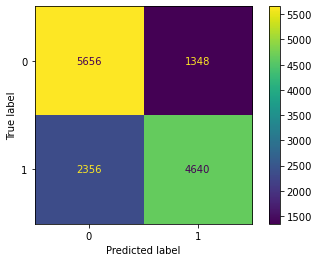

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions)
plt.show()